<a href="https://colab.research.google.com/github/jumafernandez/elementos-computacion-unlu/blob/main/notebooks/demostraciones/Sklearn-LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Lineal con Scikit-Learn

Esta es una adaptación de un ejemplo de _regresión lineal_ cuyo código original puede encontrarse [aquí](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).

## Importación de librerías

Aquí se importan las librerías que se utilizan en el ejemplo:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Carga de datos

Se cargan los datos que se utilizan en el ejemplo. En este caso, se utiliza un dataset de ejemplo que trata sobre la [diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset).

In [ ]:
from sklearn.datasets import load_diabetes

# Cargo el dataset
diabetes = load_diabetes(as_frame=True)

# Muestro la descripción que viene en el objeto
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Se toma sólo una variable independiente, el BMI (índice de masa corporal), para estimar la diabetes:

In [ ]:
diabetes_X = diabetes.data.bmi

diabetes_X

0      0.061696
1     -0.051474
2      0.044451
3     -0.011595
4     -0.036385
         ...   
437    0.019662
438   -0.015906
439   -0.015906
440    0.039062
441   -0.073030
Name: bmi, Length: 442, dtype: float64

Se separa en la variable dependiente la medida de la diabetes:

In [ ]:
diabetes_y = diabetes.target

diabetes_y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

En la carga de datos se separan las instancias en instancias para entrenamiento del modelo y otras para la validación.

In [ ]:
# Variable/s independiente/s
diabetes_X_train = diabetes_X[:-20].values.reshape(-1, 1)
diabetes_X_test = diabetes_X[-20:].values.reshape(-1, 1)

# Variable dependiente
diabetes_y_train = diabetes_y[:-20].values.reshape(-1, 1)
diabetes_y_test = diabetes_y[-20:].values.reshape(-1, 1)

## Entrenamiento del modelo

Se entrena el modelo de regresión lineal:

In [ ]:
# Se crea el objeto LinearRegression de sklearn
regr = LinearRegression()

# Se entrena
regr.fit(diabetes_X_train, diabetes_y_train)

# Se hacen las predicciones sobre los datos de entrenamiento de prueba,
# para ver que tan bien ajusta el modelo entrenado
diabetes_y_pred = regr.predict(diabetes_X_test)

Recta ajustada:

In [ ]:
print("Coeficiente: ", regr.coef_)
print("Término independiente: ", regr.intercept_)

Coeficiente:  [[938.23786125]]
Término independiente:  [152.91886183]


## Validación del modelo

Se verifican las métricas de selección de modelos asociadas al error del ajuste:

In [ ]:
print("Error cuadrado medio: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print("Coeficiente de determinación: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Error cuadrado medio: 2548.07
Coeficiente de determinación: 0.47


## Gráfica del modelo

Se grafican los datos junto con la recta ajustada:

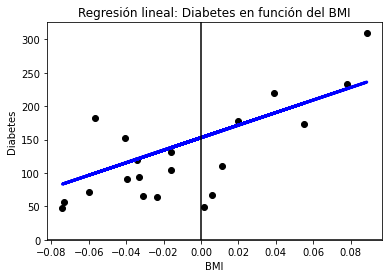

In [ ]:
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.title("Regresión lineal: Diabetes en función del BMI")
plt.xlabel("BMI")
plt.ylabel("Diabetes")

# Agrego el eje X en 0
plt.axhline(0, c='black', ls='-')

# Agrego el eje Y en 0
plt.axvline(0, c='black', ls='-')

plt.ylim(bottom=0)

plt.show()